<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/6.%20Python%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FLinear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**6. Linear Regression using sklearn**

In [25]:
import numpy as np
!pip install scikit-learn==1.1.0 #scikit-learn 1.2以降ではBoston datasetが削除されているため
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

#Bostonの住宅価格データ
標本数506、よく練習に使われるデータ

In [26]:
boston = load_boston()
np.random.seed(1234)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [27]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
import pandas as pd

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target
df = pd.DataFrame(X_array, columns = boston.feature_names).assign(MEDV=np.array(y_array))

df

In [29]:
# 説明変数：13項目のうち1つだけ使う
x = boston.data[:, 5]
# 目的変数：住宅価格のデータを使う
y = boston.target

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=5, c="red")

#**最急降下法について学習しよう**
Cost: J = (sum((θ×X - y)^2)/2m <br>
Cost function: J(θ) =1/2m * Σ(hθ(x(i)^-y(i)))^2 <br>

最急降下法：(Cost function J(θ)の微分を減算する）<br>
θj = θj - α * 1/m * Σ((h(x(i)-y(i))*Xj(i) )

In [70]:
#今回は一次関数で近似します。
#y=bx+a (y=a*1 +b*x)の係数[a,b]としてランダムな値を作成する
theta = np.random.random(len(X[0]))
theta

array([0.50308317, 0.01376845])

In [71]:
# [1,x]に相当する行列を作成する
X = np.array([[1, v] for v in x])
X

array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185],
       ...,
       [1.   , 6.976],
       [1.   , 6.794],
       [1.   , 6.03 ]])

In [72]:
# 微分値により係数をどれぐらい動かすかを決定する
alpha = 0.01

In [73]:
y_pred = np.dot(X, theta)
y_pred

array([0.59361072, 0.59149038, 0.60200948, 0.59943478, 0.60148627,
       0.5916143 , 0.58585908, 0.58806204, 0.5806133 , 0.58574894,
       0.59088457, 0.58581778, 0.58416556, 0.58499167, 0.58701563,
       0.5834083 , 0.58479891, 0.58555618, 0.57820383, 0.58193508,
       0.57977343, 0.58521197, 0.58764898, 0.58311916, 0.58464746,
       0.58017271, 0.58311916, 0.58634098, 0.59250925, 0.5949738 ,
       0.58174232, 0.58668519, 0.58500544, 0.5815771 , 0.58701563,
       0.58477138, 0.58350468, 0.5836286 , 0.58522574, 0.59388609,
       0.59979276, 0.59629557, 0.58802073, 0.58859901, 0.58664389,
       0.5813155 , 0.58274741, 0.58610692, 0.57741902, 0.58021402,
       0.58518443, 0.58727723, 0.59272954, 0.58566633, 0.5841518 ,
       0.60289066, 0.59096718, 0.59692892, 0.58769029, 0.58468877,
       0.58212783, 0.58522574, 0.59197228, 0.59618542, 0.60089423,
       0.58968671, 0.58276118, 0.58401411, 0.58010387, 0.58411049,
       0.59143531, 0.58515689, 0.58658881, 0.58906713, 0.58945

In [85]:
# w0の項を追加するためにxに小細工をする
X = np.array([[1, v] for v in x])
# ランダムな値をw0, w1の初期値に設定する
theta = np.random.random(len(X[0]))
# ちょっと変えるための度合いを決める
alpha = 0.01

# ------wをちょっとずつ変えていくループを実行------
# ループ回数100回、1000回、10000回、100000回でwを保存する
theta_1 = []
theta_10 = []
theta_100 = []
theta_1000 = []
theta_10000 = []
for i in range(100000):
    # y_pred=b*1+a*xに先ほどの行列を代入して予測値y_predを計算する。dotは行列の積を計算するコード
    y_pred = np.dot(X, theta)
    # 最小二乗法の損失関数 loss_func = (y-y_pred)^2 = (y-theta*X)^2
    # loss_funcをthetaで微分すると、2*theta*X^2  2Xy = 2(theta*X-y)*X = -2(y-y_pred)*X
    dw = -2*np.dot((y - y_pred), X) / len(X)
    # wをちょっとだけ動かす
    theta -= alpha * dw

    #1, 10, 100, 1000, 10000, 100000回目のthetaを記録
    if i == 1-1:
        # listはnp.copyしないとコピー元と同期してしまうので注意！
        theta_1 = np.copy(theta)
        print(f"dw_1: {dw}")
    if i == 10-1:
        theta_10 = np.copy(theta)
        print(f"dw_10: {dw}")
    if i == 100-1:
        theta_100 = np.copy(theta)
        print(f"dw_100: {dw}")
    elif i == 1000-1:
        theta_1000 = np.copy(theta)
        print(f"dw_1000: {dw}")
    elif i == 10000-1:
        theta_10000 = np.copy(theta)
        print(f"dw_10000: {dw}")
    elif i == 100000-1:
        theta_100000 = np.copy(theta)
        print(f"dw_100000: {dw}")

dw_1: [ -37.84497687 -246.38117302]
dw_10: [ 0.86411072 -0.13589379]
dw_100: [ 0.84561561 -0.13293506]
dw_1000: [ 0.68103509 -0.10706217]
dw_10000: [ 0.07818698 -0.01229139]
dw_100000: [ 3.11014877e-11 -4.94723103e-12]


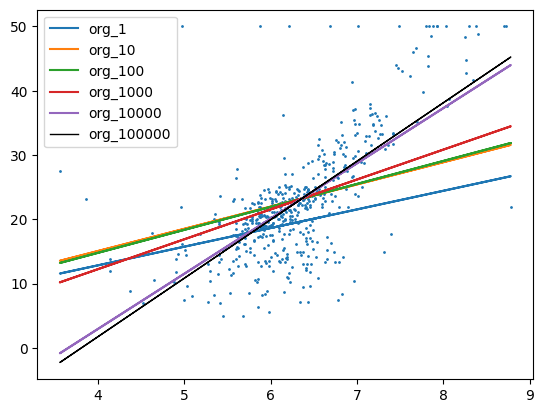

In [86]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)

# ----------------計算式の結果-------------------
plt.plot(x, np.dot(X, theta_1), label='org_1')
plt.plot(x, np.dot(X, theta_10), label='org_10')
plt.plot(x, np.dot(X, theta_100), label='org_100')
plt.plot(x, np.dot(X, theta_1000), label='org_1000')
plt.plot(x, np.dot(X, theta_10000), label='org_10000')
plt.plot(x, np.dot(X, theta_100000), c='black', linewidth=1.0, label='org_100000')


plt.legend()
plt.show()

In [ ]:
# ######### sklearnのツールLinearRegressionを使って回帰 ###########
# ものすごく簡単...
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
pred = lr.predict(X)

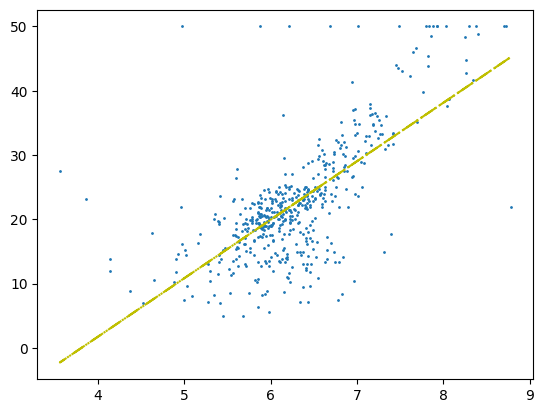

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)
# ---------------sklearnの結果------------------
plt.plot(x, pred, c='y', linestyle='dashdot', label='sklearn')
